## Project Overview Description

Drug problems in the U.S. have been prevalent for many years and one important issue is deaths caused by drug overdose. For this project I wanted to conduct data analysis to determine if deaths by drug overdose have been increasing and which states have been affected the most. I am also interested to see if one gender is more affected by drug overdoses than the other. My research will determine which states show an increase, decrease, or stability of overdose deaths and which sex is affected more by drug overdose.

#### Hypotheses:
    1. Deaths by drug overdose have increased from 1999-2020.
    2. More men have died from opioid drug overdose deaths than women.

## Dataset Description

I am using five data sets, the first shows the number of drug overdose deaths in the U.S. by state in 2018, the second for drug overdose deaths by state in 2019, and the third the percent change in deaths by state from 2018-2019. The first three datasets were obtained from the CDC website. The dataset for Drug Overdose Deaths in 2018 did not have a downloadable CSV therefore the table information was trasferred to an Excel spreadsheet. After transferring, the appropriate column names were given and the '2018 Number of Deaths' column was correctly formatted from object type to float. Once all of the appropriate transformations were complete the file was saved as a CSV. The 2019 Drug Overdose Deaths dataset and 2018-2019 Drug Overdose Death Rate Increase dataset both had a row with NaN values which were dropped to accurately compare all 3 datasets from the CDC. I included a fourth dataset that has the death rates from drug overdose from 1999-2020 from Injury Facts. Information was pulled from the Injury Facts table and converted to a CSV file. The transformed Injury Facts dataset includes the number of deaths from drug overdose for each year from 1999-2020. The fifth dataset is also from the Injury Facts table and includes the deaths by drug overdose from 1999-2020 organized by sex and the number of deaths by opioids. 

Datasets:
   - CDC
       - https://www.cdc.gov/drugoverdose/deaths/2018.html
       - https://www.cdc.gov/drugoverdose/deaths/2019.html
       - https://www.cdc.gov/drugoverdose/deaths/2018-2019-increase.html
   - Injury Facts (Two CSVs have been created from this table and transformed to CSVs)
       - https://injuryfacts.nsc.org/home-and-community/safety-topics/drugoverdoses/data-details/

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.linear_model import LinearRegression
import scipy.stats

In [2]:
deaths2018 = pd.read_csv('2018-Deaths.csv')
deaths2018.head()

,Location,Range Category,2018 Age-adjusted Rate,2018 Number of Deaths
0,Alabama,16.1 to 18.5,16.6,775.0
1,Alaska,13.6 to 16.0,14.6,110.0
2,Arizona,21.1 to 57.0,23.8,1670.0
3,Arkansas,13.6 to 16.0,15.7,444.0
4,California,11.1 to 13.5,12.8,5348.0


In [3]:
deaths2019 = pd.read_csv('2019-Deaths.csv')
deaths2019.head()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
0,Alabama,16.1 to 18.5,16.3,768.0
1,Alaska,16.1 to 18.5,17.8,132.0
2,Arizona,21.1 to 57.0,26.8,1907.0
3,Arkansas,11.1 to 13.5,13.5,388.0
4,California,13.6 to 16.0,15.0,6198.0


In [4]:
deathchange = pd.read_csv('2018-2019-Deaths.csv')
deathchange.head()

,Location,Statistically Significant Change,Percent Change from 2018-2019
0,Alabama,Stable,-1.8
1,Alaska,Stable,21.9
2,Arizona,Increase,12.6
3,Arkansas,Decrease,-14.0
4,California,Increase,17.2


In [5]:
deathstimeline = pd.read_csv('DODRTimeline.csv')
deathstimeline.head()

,Year,Deaths
0,1999,16849.0
1,2000,17416.0
2,2001,19394.0
3,2002,23518.0
4,2003,25785.0


In [6]:
opioidtimeline = pd.read_csv('OpioidTimeline.csv')
opioidtimeline.head()

,Year,Gender,Drug Type,Deaths
0,2020,Both AD,All Drugs,91799.0
1,2020,Both AO,Any Opioid B,68630.0
2,2020,Female,Any Opioid F,19970.0
3,2020,Male,Any Opioid M,48660.0
4,2019,Both AD,All Drugs,70630.0


The opioidtimeline table is broken down by year (1999-2020), how many deaths from all drugs from both genders (Both AD), how many deaths from both genders for any opioids (Both AO), and then deaths from any opioids for males and females specificallly

In [7]:
deaths2018.shape

(51, 4)

In [8]:
deaths2019.shape

(52, 4)

In [9]:
deathchange.shape

(52, 3)

In [10]:
deathstimeline.shape

(22, 2)

In [11]:
opioidtimeline.shape

(88, 4)

The deaths dataset for 2019 and the change in deaths 2018-2019 deaths dataset both have an extra row compared to the 2018 dataset. 

In [12]:
deaths2019.tail()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
47,Washington,13.6 to 16.0,15.8,1259.0
48,West Virginia,21.1 to 57.0,52.8,870.0
49,Wisconsin,21.1 to 57.0,21.1,1201.0
50,Wyoming,13.6 to 16.0,14.1,79.0
51,NaN,NaN,NaN,NaN


In [13]:
deathchange.tail()

,Location,Statistically Significant Change,Percent Change from 2018-2019
47,Washington,Stable,6.8
48,West Virginia,Stable,2.5
49,Wisconsin,Increase,9.9
50,Wyoming,Stable,27.0
51,NaN,NaN,NaN


We can see that both of the datasets contain a row with NaN values that do not pertain to the dataset. The NaN row can be dropped from both datasets to have comparable sized datasets.

## Data Wrangling

In [14]:
deaths2019.isnull().sum()

Location                  1
Range Category            1
2019 Age-adjusted Rate    1
2019 Number of Deaths     1
dtype: int64

In [15]:
deaths2019 = deaths2019.dropna()

In [16]:
deaths2019.tail()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
46,Virginia,16.1 to 18.5,18.3,1547.0
47,Washington,13.6 to 16.0,15.8,1259.0
48,West Virginia,21.1 to 57.0,52.8,870.0
49,Wisconsin,21.1 to 57.0,21.1,1201.0
50,Wyoming,13.6 to 16.0,14.1,79.0


In [17]:
deaths2019.shape

(51, 4)

In [18]:
deathchange.isnull().sum()

Location                             1
Statistically Significant Change     1
Percent Change from 2018-2019        1
dtype: int64

In [19]:
deathchange = deathchange.dropna()

In [20]:
deathchange.tail()

,Location,Statistically Significant Change,Percent Change from 2018-2019
46,Virginia,Stable,7.0
47,Washington,Stable,6.8
48,West Virginia,Stable,2.5
49,Wisconsin,Increase,9.9
50,Wyoming,Stable,27.0


In [21]:
deathstimeline.isnull().sum()

Year      0
Deaths    0
dtype: int64

In [22]:
opioidtimeline.isnull().sum()

Year         0
Gender       0
Drug Type    0
Deaths       0
dtype: int64

Visualize the types of data for each dataset

In [23]:
deaths2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                51 non-null     object 
 1   Range Category          51 non-null     object 
 2   2018 Age-adjusted Rate  51 non-null     float64
 3   2018 Number of Deaths   51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [24]:
deaths2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                51 non-null     object 
 1   Range Category          51 non-null     object 
 2   2019 Age-adjusted Rate  51 non-null     float64
 3   2019 Number of Deaths   51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [25]:
deathchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           51 non-null     object 
 1   Statistically Significant Change   51 non-null     object 
 2   Percent Change from 2018-2019      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [26]:
deathstimeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    22 non-null     int64  
 1   Deaths  22 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [27]:
opioidtimeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       88 non-null     int64  
 1   Gender     88 non-null     object 
 2   Drug Type  88 non-null     object 
 3   Deaths     88 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


After looking at the datatypes that each dataset has we can see that all of the columns have the appropriate datatypes for data exploration.

In [28]:
deaths2018.describe()

,2018 Age-adjusted Rate,2018 Number of Deaths
count,51.000000,51.000000
mean,22.039216,1320.921569
std,10.025389,1320.472171
min,6.900000,57.000000
25%,13.750000,331.000000
50%,21.200000,856.000000
75%,27.700000,1746.500000
max,51.500000,5348.000000


In [29]:
deaths2019.describe()

,2019 Age-adjusted Rate,2019 Number of Deaths
count,51.000000,51.000000
mean,23.139216,1384.901961
std,10.184009,1407.558557
min,8.700000,79.000000
25%,14.650000,379.500000
50%,21.100000,870.000000
75%,30.050000,1998.000000
max,52.800000,6198.000000


In [30]:
deathchange.describe()

,Percent Change from 2018-2019
count,51.000000
mean,7.096078
std,11.968709
min,-14.000000
25%,-1.250000
50%,6.800000
75%,13.050000
max,52.200000


In [31]:
deathstimeline.describe()

,Year,Deaths
count,22.000000,22.000000
mean,2009.500000,42392.500000
std,6.493587,19800.352887
min,1999.000000,16849.000000
25%,2004.250000,28021.250000
50%,2009.500000,37666.500000
75%,2014.750000,51066.750000
max,2020.000000,91799.000000


In [32]:
opioidtimeline.describe()

,Year,Deaths
count,88.000000,88.000000
mean,2009.500000,23428.125000
std,6.380646,18750.173308
min,1999.000000,2057.000000
25%,2004.000000,9098.500000
50%,2009.500000,17132.000000
75%,2015.000000,33424.500000
max,2020.000000,91799.000000


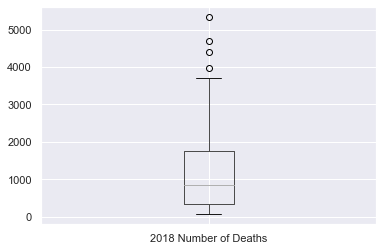

In [33]:
deaths2018.boxplot(column=['2018 Number of Deaths']);

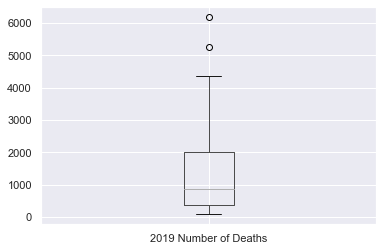

In [34]:
deaths2019.boxplot(column=['2019 Number of Deaths']);

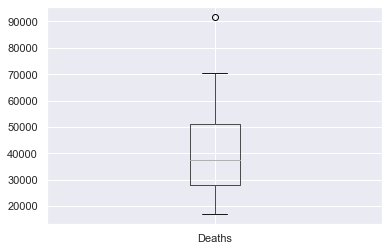

In [35]:
deathstimeline.boxplot(column=['Deaths']);

In [36]:
deaths2018.shape

(51, 4)

In [37]:
deaths2019.shape

(51, 4)

In [38]:
deathchange.shape

(51, 3)

In [39]:
deathstimeline.shape

(22, 2)

In [40]:
opioidtimeline.shape

(88, 4)

The deaths2018 and deaths2019 dataframes (datasets) are the same shape so the data will be comparable.

## Statistical Analysis

Hypothesis: Deaths by drug overdose has increased from 2018 to 2019 in the U.S.

In [41]:
deathsin2018 = deaths2018['2018 Number of Deaths'].sum()
print(f'Number of deaths in the U.S. from drug overdose in 2018: {deathsin2018}')

Number of deaths in the U.S. from drug overdose in 2018: 67367.0


In [42]:
deathsin2019 = deaths2019['2019 Number of Deaths'].sum()
print(f'Number of deaths in the U.S. from drug overdose in 2019: {deathsin2019}')

Number of deaths in the U.S. from drug overdose in 2019: 70630.0


From the analysis above we can see that there is an increase of 3,263 deaths from 2018 to 2019 in the U.S.

#### Linear Regression

In [43]:
data = pd.read_csv('DODRTimeline.csv')  
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)  

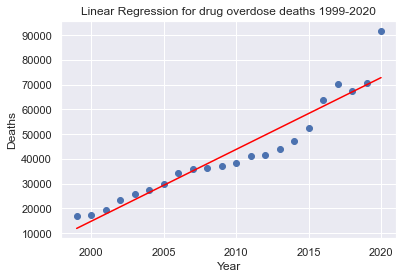

In [44]:
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Linear Regression for drug overdose deaths 1999-2020')
plt.show()

In [45]:
deathstimeline.describe()

,Year,Deaths
count,22.000000,22.000000
mean,2009.500000,42392.500000
std,6.493587,19800.352887
min,1999.000000,16849.000000
25%,2004.250000,28021.250000
50%,2009.500000,37666.500000
75%,2014.750000,51066.750000
max,2020.000000,91799.000000


#### P-value

The p-value is used to help support or reject the null hypothesis.

In [46]:
from scipy import stats
rvs = stats.norm.rvs(loc = 42392.5, scale = 19800.35, size =(22,1)) # loc = Deaths mean, scale = Deaths std
print(stats.ttest_1samp(rvs,42392.5)) # Deaths mean

Ttest_1sampResult(statistic=array([0.24013987]), pvalue=array([0.81255046]))


#### R squared

The squared value is used to determine how close the data points are to the regression line. The r squared values range from 0 to 1, the closer the r squared value is to 1 means that there is a positive linear relationship between the two variables. 

In [47]:
x_values = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
y_values = [16849,17416,19394,23518,25785,27424,29813,34425,36010,36450,37004,38329,41340,41502,43982,47055,52404,63632,70237,67637,70630,91799]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'r squared value: {r_squared}')

r squared value: 0.9053522694408465


#### Correlation

In [48]:
deathstimeline[['Year', 'Deaths']].corr()

,Year,Deaths
Year,1.0000,0.9515
Deaths,0.9515,1.0000


## Project Findings

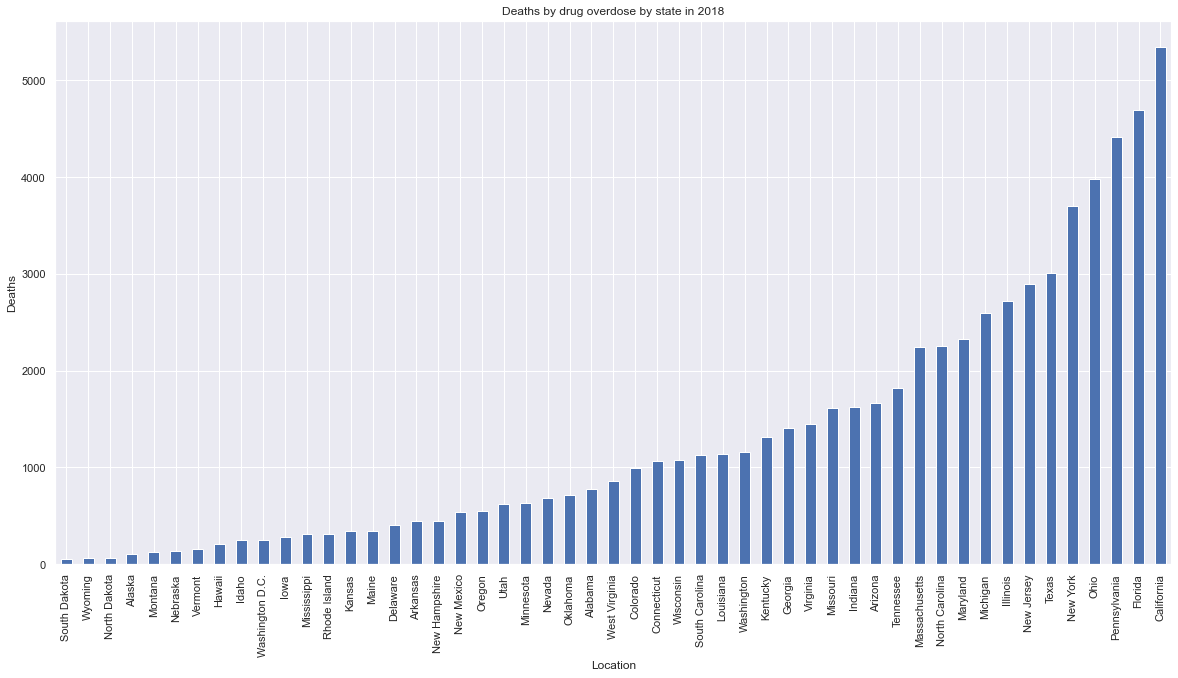

In [123]:
sorted2018 = deaths2018.sort_values('2018 Number of Deaths')
sorted2018.plot.bar(x='Location', y='2018 Number of Deaths', legend=False);
plt.gcf().set_size_inches(20,10);
plt.title('Deaths by drug overdose by state in 2018');
plt.ylabel('Deaths');

The graph above shows the number of deaths from drug overdose per state in the U.S. in 2018. 

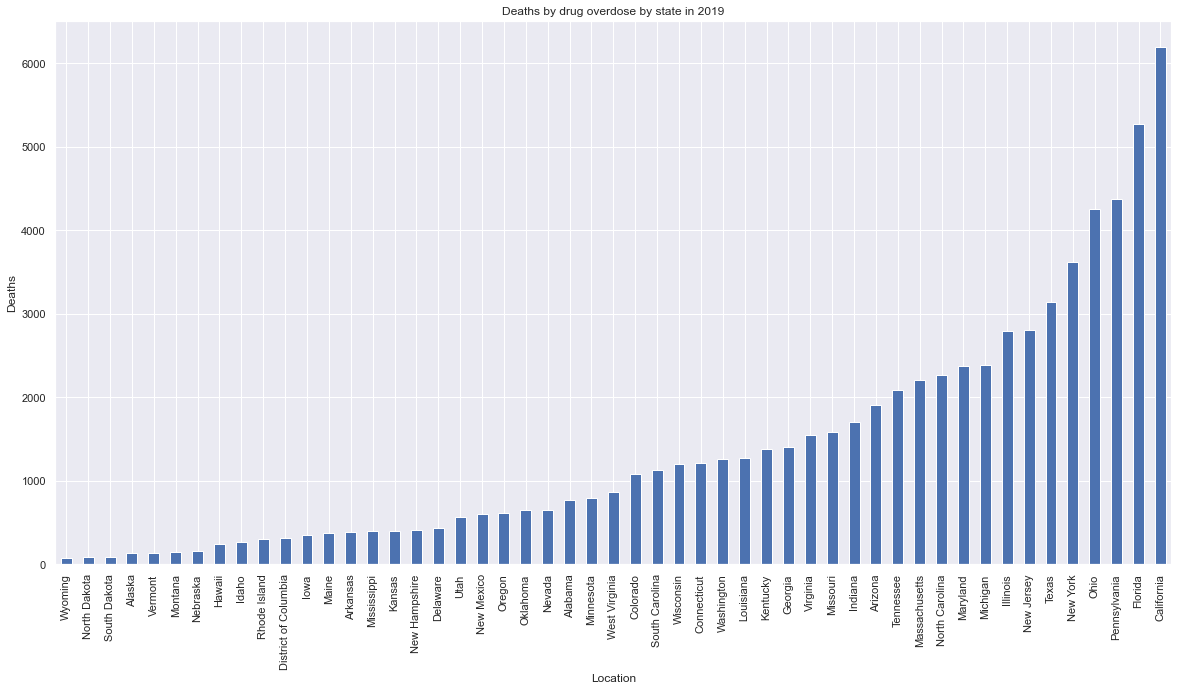

In [122]:
sorted2019 = deaths2019.sort_values('2019 Number of Deaths')
sorted2019.plot.bar(x='Location', y='2019 Number of Deaths', legend=False);
plt.gcf().set_size_inches(20,10);
plt.title('Deaths by drug overdose by state in 2019');
plt.ylabel('Deaths');

The graph above shows the number of deaths from drug overdose per state in the U.S. in 2019.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


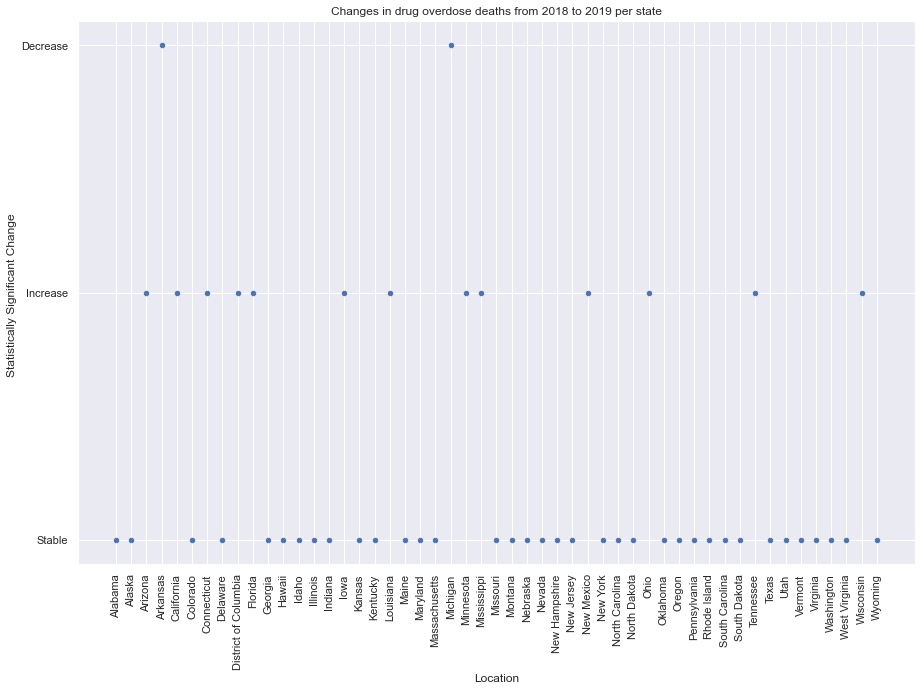

In [53]:
deathchange.plot.scatter(x='Location', y='Statistically Significant Change ', figsize=(15,10))
plt.title('Changes in drug overdose deaths from 2018 to 2019 per state')
plt.xticks(rotation=90)
plt.show()

The scatterplot above shows the differences in deaths per state from 2018-2019. The states can have an increase, decrease, or stable rate of overdose deaths.

In [54]:
top5inc = deathchange[deathchange['Statistically Significant Change '] == 'Increase'].sort_values(by=['Percent Change from 2018-2019'], ascending=False).head(5)
top5inc

,Location,Statistically Significant Change,Percent Change from 2018-2019
24,Mississippi,Increase,25.9
23,Minnesota,Increase,23.5
8,District of Columbia,Increase,22.0
15,Iowa,Increase,19.8
4,California,Increase,17.2


The table above shows the top 5 states that had an increase of drug overdose deaths from 2018-2019.

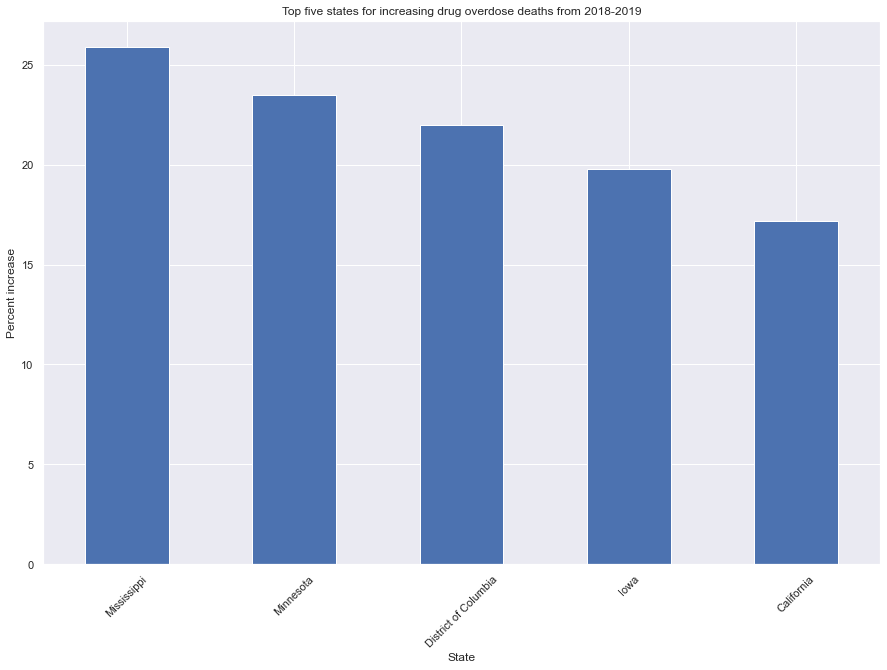

In [55]:
top5inc.plot.bar(x='Location', y='Percent Change from 2018-2019', legend=False, figsize=(15,10));
plt.title('Top five states for increasing drug overdose deaths from 2018-2019');
plt.ylabel('Percent increase');
plt.xlabel('State');
plt.xticks(rotation=45);

The bar chart above displays the top 5 states for percent increae of drug overdose deaths from 2018-2019. 

In [56]:
top5dec = deathchange[deathchange['Statistically Significant Change '] == 'Decrease'].sort_values(by=['Percent Change from 2018-2019'], ascending=False).head(5)
top5dec

,Location,Statistically Significant Change,Percent Change from 2018-2019
22,Michigan,Decrease,-8.3
3,Arkansas,Decrease,-14.0


The table above lists the states that had a decrease in overdose deaths from 2018-2019 in the U.S.

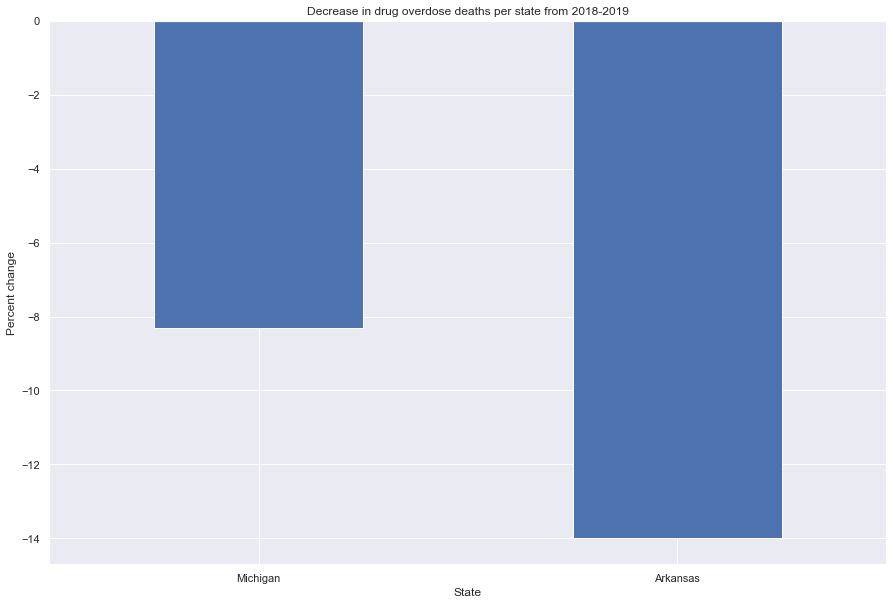

In [57]:
top5dec.plot.bar(x='Location', y='Percent Change from 2018-2019', legend=False, figsize=(15,10));
plt.title('Decrease in drug overdose deaths per state from 2018-2019');
plt.ylabel('Percent change');
plt.xticks(rotation=360);
plt.xlabel('State');

The bar graph above displays the two states that had a decrease in overdose deaths in terms of percentage. 

The table above lists all of the states that had a 'Stable' value in drug overdose deaths

In [58]:
stable = deathchange[deathchange['Statistically Significant Change '] == 'Stable'].sort_values(by=['Percent Change from 2018-2019'], ascending=False)
stable

,Location,Statistically Significant Change,Percent Change from 2018-2019
41,South Dakota,Stable,52.2
50,Wyoming,Stable,27.0
1,Alaska,Stable,21.9
27,Nebraska,Stable,17.6
26,Montana,Stable,15.6
16,Kansas,Stable,15.3
34,North Dakota,Stable,11.8
11,Hawaii,Stable,11.2
37,Oregon,Stable,11.1
7,Delaware,Stable,9.6


In [59]:
stable = stable.head()
stable

,Location,Statistically Significant Change,Percent Change from 2018-2019
41,South Dakota,Stable,52.2
50,Wyoming,Stable,27.0
1,Alaska,Stable,21.9
27,Nebraska,Stable,17.6
26,Montana,Stable,15.6


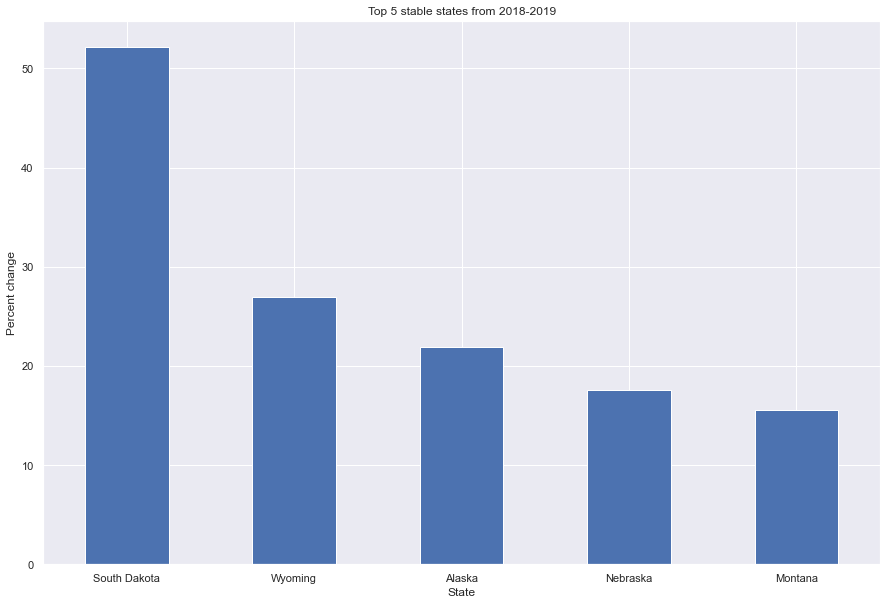

In [60]:
stable.plot.bar(x='Location', y='Percent Change from 2018-2019', legend=False, figsize=(15,10));
plt.title('Top 5 stable states from 2018-2019');
plt.ylabel('Percent change');
plt.xticks(rotation=360);
plt.xlabel('State');

#### Changes in drug overdose deaths in Arizona from 2018-2019

In [61]:
Az18 = deaths2018[deaths2018['Location'] == 'Arizona']['2018 Number of Deaths']
Az18

2    1670.0
Name: 2018 Number of Deaths, dtype: float64

In [62]:
Az19 = deaths2019[deaths2019['Location'] == 'Arizona']['2019 Number of Deaths']
Az19

2    1907.0
Name: 2019 Number of Deaths, dtype: float64

In [63]:
Arizonachange = Az19-Az18
Arizonachange

2    237.0
dtype: float64

There was an increase of 237 deaths in Arizona from 2018-2019

In [64]:
dfmerge = pd.merge(deaths2018,deaths2019)
dfmerge

,Location,Range Category,2018 Age-adjusted Rate,2018 Number of Deaths,2019 Age-adjusted Rate,2019 Number of Deaths
0,Alabama,16.1 to 18.5,16.6,775.0,16.3,768.0
1,Arizona,21.1 to 57.0,23.8,1670.0,26.8,1907.0
2,Colorado,16.1 to 18.5,16.8,995.0,18.0,1079.0
3,Connecticut,21.1 to 57.0,30.7,1069.0,34.7,1214.0
4,Delaware,21.1 to 57.0,43.8,401.0,48.0,435.0
5,Florida,21.1 to 57.0,22.8,4698.0,25.5,5268.0
6,Georgia,11.1 to 13.5,13.2,1404.0,13.1,1408.0
7,Hawaii,13.6 to 16.0,14.3,213.0,15.9,242.0
8,Idaho,13.6 to 16.0,14.6,250.0,15.1,265.0
9,Illinois,21.1 to 57.0,21.3,2722.0,21.9,2790.0


In [65]:
arizona = dfmerge[dfmerge['Location'] == 'Arizona'][['2018 Number of Deaths','2019 Number of Deaths']]

arizona

,2018 Number of Deaths,2019 Number of Deaths
1,1670.0,1907.0


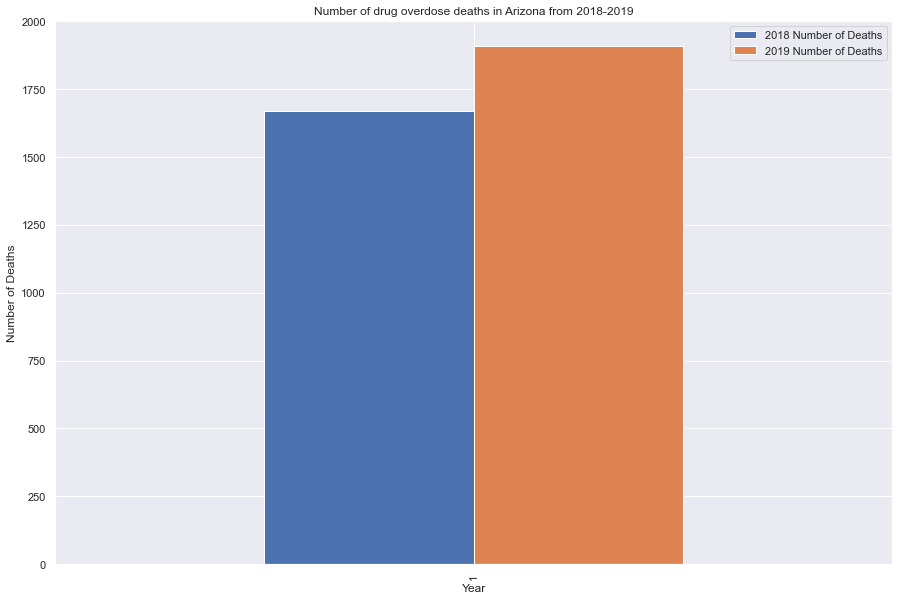

In [66]:
arizona.plot.bar(figsize=(15,10));
plt.ylabel('Number of Deaths');
plt.xlabel('Year');
plt.title('Number of drug overdose deaths in Arizona from 2018-2019');

#### Death rates from 1999-2020

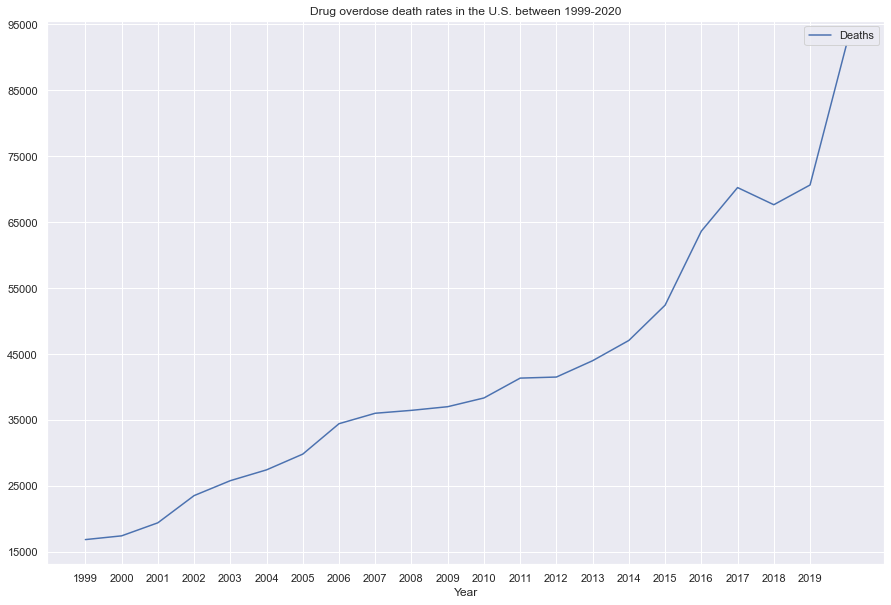

In [126]:
deathstimeline.plot.line(x='Year', y='Deaths', figsize=(15,10));
a = [1999,2005,2010,2015,2020]
b = [15000,25000,35000,50000,6000,75000,100000]
x_ticks = np.arange(1999,2020,1)
plt.xticks(x_ticks);
y_ticks = np.arange(15000,100000,10000);
plt.yticks(y_ticks);
plt.title('Drug overdose death rates in the U.S. between 1999-2020');

In [68]:
opioidtimeline.head(10)

,Year,Gender,Drug Type,Deaths
0,2020,Both AD,All Drugs,91799.0
1,2020,Both AO,Any Opioid B,68630.0
2,2020,Female,Any Opioid F,19970.0
3,2020,Male,Any Opioid M,48660.0
4,2019,Both AD,All Drugs,70630.0
5,2019,Both AO,Any Opioid B,49860.0
6,2019,Female,Any Opioid F,15225.0
7,2019,Male,Any Opioid M,34635.0
8,2018,Both AD,All Drugs,67637.0
9,2018,Both AO,Any Opioid B,46802.0


#### Total drug overdose deaths for All Drugs for both genders

In [69]:
alldrugs = opioidtimeline[opioidtimeline['Gender'] == 'Both AD']['Deaths'].sum()
print(f'The total number of drug overdose deaths from all drugs for both genders 1999-2020: {alldrugs}')

The total number of drug overdose deaths from all drugs for both genders 1999-2020: 932637.0


#### Total drug overdose deaths for opioids for both genders

In [70]:
opioiddeaths = opioidtimeline[opioidtimeline['Gender'] == 'Both AO']['Deaths'].sum()
print(f'The total number of drug overdose deaths for opioids for both genders 1999-2020: {opioiddeaths}')

The total number of drug overdose deaths for opioids for both genders 1999-2020: 564522.0


#### Total drug overdose deaths from opioids for Males

In [71]:
maletotal = opioidtimeline[opioidtimeline['Gender'] == 'Male']['Deaths'].sum()
print(f'The total number of drug overdose deaths from opioids for males 1999-2020: {maletotal}')

The total number of drug overdose deaths from opioids for males 1999-2020: 378974.0


#### Total drug overdose deaths from opioids for Females

In [72]:
femaletotal = opioidtimeline[opioidtimeline['Gender'] == 'Female']['Deaths'].sum()
print(f'The total number of drug overdose deaths from opioids for females 1999-2020: {femaletotal}')

The total number of drug overdose deaths from opioids for females 1999-2020: 185542.0


#### Opioid drug overdose deaths

In [73]:
opioidpercentage = opioiddeaths/alldrugs
percentage = "{:.00%}".format(opioidpercentage)
print(f'Opioids accounted for {percentage} of all drug overdose deaths from 1999-2020')

Opioids accounted for 61% of all drug overdose deaths from 1999-2020


#### Male drug overdose deaths from opioids

In [74]:
maleopioiddeaths = maletotal/opioiddeaths
percentage = "{:.00%}".format(maleopioiddeaths)
print(f'Males accounted for {percentage} of all drug overdose deaths from opioids 1999-2020')

Males accounted for 67% of all drug overdose deaths from opioids 1999-2020


#### Female drug overdose deaths from opioids

In [75]:
femaleopioiddeaths = femaletotal/opioiddeaths
percentage = "{:.00%}".format(femaleopioiddeaths)
print(f'Females accounted for {percentage} of all drug overdose deaths from opioids 1999-2020')

Females accounted for 33% of all drug overdose deaths from opioids 1999-2020


#### Opioid deaths per sex 1999-2020

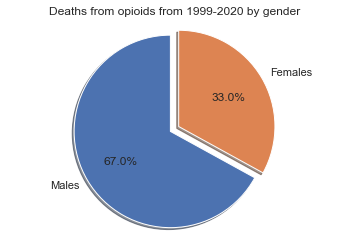

In [76]:
labels = 'Males', 'Females'
sizes = [67,33]
fig1, ax1 = plt.subplots()
explode = (0,0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Deaths from opioids from 1999-2020 by gender')
plt.show()

#### Opioid deaths vs. all other drug overdose deaths

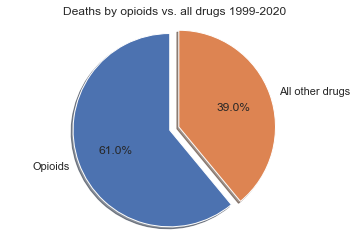

In [77]:
labels = 'Opioids', 'All other drugs'
sizes = [61,39]
fig1, ax1 = plt.subplots()
explode = (0,0.1)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Deaths by opioids vs. all drugs 1999-2020')
plt.show()

Based on the findings we can see that deaths by drug overdose in the U.S. from 2018 to 2019 have increased across the country. There were only two states that showed a decrease in deaths from 2018-2019. The U.S. as a whole had an increase in deaths by drug overdose from 16,849 in 1999 to 91,799 in 2020. The number of deaths by drug overdose has increased over 5 times in the span of 21 years. Men had twice as many deaths than women from opioids.The increase in drug overdose deaths could be caused by many factors such as crime rate, mental health, or laced substances. The causes for overdoses is a case by case situation, however the states that showed an increase in deaths in 2019 should look at the policies and procedures for the two states that showed a decrease in deaths. Combatting drug overdose deaths does not have a simple approach, this problem has to be tackled by many different sources including medical professionals, law enforcement, and domestic accountability.